# Apartment Listings Analysis

You are provided with data from the Yandex.Real Estate service — an archive of apartment sale listings in Saint Petersburg and nearby localities collected over several years. The goal is to learn how to determine the market value of residential properties. Your task is to identify the key parameters that influence property prices. This will make it possible to build an automated system that can detect anomalies and fraudulent activity.
For each apartment listed for sale, two types of data are available. The first type is entered by users, and the second is obtained automatically based on cartographic data. For example, this includes the distance to the city center, the airport, the nearest park, and a body of water.

### Step 1. Open the data file and examine the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 30)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Conclusion

1. The DataFrame consists of 23,699 rows and 22 columns.
2. Missing values are present in the following columns:
['ceiling_height'], ['living_area'],['is_apartment'],['kitchen_area'],
['balcony'],['airports_nearest'],['cityCenters_nearest'],
['parks_around3000'],['parks_nearest'],['ponds_around3000'],
['ponds_nearest'],['days_exposition']
3. The is_apartment column has the object data type.

### Step 2. Data Preprocessing

In [4]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
missing_values_table(df)

Your selected dataframe has 22 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
is_apartment,20924,88.3
parks_nearest,15620,65.9
ponds_nearest,14589,61.6
balcony,11519,48.6
ceiling_height,9195,38.8
airports_nearest,5542,23.4
cityCenters_nearest,5519,23.3
parks_around3000,5518,23.3
ponds_around3000,5518,23.3
days_exposition,3181,13.4


In [6]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### I did not display all missing values using the isnull() method; instead, I showed them only for the ceiling_height and total_area columns. The remaining missing values are visible when using the info() method.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [8]:
df[df['ceiling_height'].isnull()].count()

total_images            9195
last_price              9195
total_area              9195
first_day_exposition    9195
rooms                   9195
ceiling_height             0
floors_total            9118
living_area             8089
floor                   9195
is_apartment             913
studio                  9195
open_plan               9195
kitchen_area            7857
balcony                 4923
locality_name           9160
airports_nearest        6617
cityCenters_nearest     6620
parks_around3000        6620
parks_nearest           2785
ponds_around3000        6620
ponds_nearest           3378
days_exposition         8467
dtype: int64

In [9]:
df[df['living_area'].isnull()].count()

total_images            1903
last_price              1903
total_area              1903
first_day_exposition    1903
rooms                   1903
ceiling_height           797
floors_total            1870
living_area                0
floor                   1903
is_apartment             120
studio                  1903
open_plan               1903
kitchen_area             439
balcony                  498
locality_name           1898
airports_nearest        1278
cityCenters_nearest     1280
parks_around3000        1280
parks_nearest            577
ponds_around3000        1280
ponds_nearest            695
days_exposition         1705
dtype: int64

##### Since the locality_name column contains categorical features, I displayed the locality names using the value_counts() method.

### Filling Missing Values

In [10]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


##### Missing values in the balcony, parks_around3000, and ponds_around3000 columns were filled with 0, as these missing values may indicate the absence of a balcony, a park, or a pond.

In [11]:
df['balcony'] = df['balcony'].fillna(0)

In [12]:
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [13]:
df['balcony'].count()

23699

In [14]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [15]:
df['parks_around3000'].value_counts()

0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [16]:
df['parks_around3000'].count()

23699

In [17]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [18]:
df['ponds_around3000'].value_counts()

0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64

In [19]:
df['ponds_around3000'].count()

23699

#### Filling Missing Values in the [ceiling_height] column

In [20]:
df_celling_median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(df_celling_median)
df_celling_median

2.65

##### I calculated the median ceiling height and used the fillna() method to fill in the missing values.

In [21]:
df.dropna(subset=['locality_name'], how='all', inplace = True)

In [22]:
df.dropna(subset=['floors_total'], how='all', inplace = True)

##### Using the dropna() method, I removed missing values in the locality_name and floors_total columns, as they account for less than 1% of the data.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

### Data Type Conversion

In [24]:
#df['is_apartment'] = df['is_apartment'].astype(bool)

In [25]:
df['is_apartment'] = df['is_apartment'].fillna('-1')

In [26]:
df['is_apartment'] = df['is_apartment'].astype(int)

In [27]:
df['is_apartment'].value_counts()

-1    20805
 0     2710
 1       50
Name: is_apartment, dtype: int64

####  In the last_price, floors_total, balcony, parks_around3000, and ponds_around3000 columns, the data type was converted from float to integer using the astype() method.

In [28]:
df['last_price'] = df['last_price'].astype(int)

In [29]:
df['floors_total'] = df['floors_total'].astype(int)

In [30]:
df['balcony'] = df['balcony'].astype(int)

In [31]:
df['parks_around3000'] = df['parks_around3000'].astype(int)

In [32]:
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

##### I wanted to convert the float type in the columns ['airports_nearest'], ['cityCenters_nearest'], ['parks_nearest'], ['ponds_nearest'], and ['days_exposition'] to integer, but encountered errors due to missing values. Using the round() method, I rounded the values in ['days_exposition'] to one decimal place.

In [33]:
df['days_exposition'] = df['days_exposition'].round(0)

In [34]:
ratio_living = (df['living_area'] / df['total_area']).round(2)
ratio_living.head()

0    0.47
1    0.46
2    0.61
3     NaN
4    0.32
dtype: float64

#### For each row, I calculated the ratio of ['living_area'] to ['total_area'] and obtained the median value.

In [35]:
living_median = ratio_living.median()
living_median

0.57

In [36]:
def fill_by_living_area(value):
    if value.isna()['living_area'] == True:
        value['living_area'] = value['total_area'] * living_median
    return value

#### I wrote a function that fills missing values in ['living_area'] by multiplying ['total_area'] by the median ratio.

In [37]:
df = df.apply(fill_by_living_area, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,-1,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,-1,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,-1,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,90.63,9,-1,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,-1,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


#### I also calculated the median kitchen area.

<span style="color:green"> I initially tried filling missing values in the ['kitchen_area'] column using approximately half of the difference between total area and living area for each row. However, I commented out this method and did not fill the missing values, because kitchen area is only used for calculating its ratio to total area and adding it to the table, and nowhere else. I even tried using a pivot table, but this caused errors because each median value turned out to be unique.</span>

In [38]:
kitchen_ratio = (df['total_area'] - df['living_area'])
kitchen_ratio.head()

0    57.00
1    21.80
2    21.70
3    68.37
4    68.00
dtype: float64

In [39]:
#kitchen_pivot = df.pivot_table(index='kitchen_area',values='living_area',aggfunc='median')
#kitchen_pivot.round(1)

In [40]:
#def fill_by_kitchen_area(value):
   # if value.isna()['kitchen_area'] == True:
      #  value['kitchen_area'] = (value['total_area'] - value['living_area']) / 2
   # return value

In [41]:
#df = df.apply(fill_by_kitchen_area, axis=1)
#df

### Handling Duplicates

In [42]:
len(df['locality_name'].value_counts())

364

In [43]:
unique_locality_lst = df['locality_name'].drop_duplicates().reset_index(drop=True)
unique_locality_lst

0                            Санкт-Петербург
1                             посёлок Шушары
2                  городской посёлок Янино-1
3                          посёлок Парголово
4                             посёлок Мурино
5                                  Ломоносов
6                                  Сертолово
7                                   Петергоф
8                                     Пушкин
9                            деревня Кудрово
10                                  Коммунар
11                                   Колпино
12       поселок городского типа Красный Бор
13                                   Гатчина
14                            поселок Мурино
15                       деревня Фёдоровское
16                                    Выборг
17                                 Кронштадт
18                                   Кировск
19                   деревня Новое Девяткино
20                      посёлок Металлострой
21           посёлок городского типа Лебяжье
22        

#### I removed duplicates and stored the result in the variable unique_locality_lst.

In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
median_map = dict()
for locality in unique_locality_lst:
    data = df.query('locality_name == @locality  ')
    median_map[locality] = data[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']].median()
    
median_map['Кронштадт']

airports_nearest       67850.0
cityCenters_nearest    49575.0
parks_nearest            293.0
ponds_nearest            312.0
dtype: float64

####  I wrote a loop that iterates over unique_locality_lst and, for each locality in the list, identifies the corresponding city name. For each of these elements, a subset containing only that locality is created, the median values for this subset are calculated, and the results are added to a dictionary

In [45]:
col_lst = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']
def fill_all_nans(row):
    row_isnull = pd.isnull(row)
    for index, col in enumerate(col_lst):
        if row_isnull[col] == True:
            locality = row['locality_name']
            row[col] = median_map[locality][index]
    return row

#### I also wrote a function that takes a row as input and, if any of the columns ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest'] contain NaN, replaces them with the corresponding median value from the median_map.

In [46]:
df = df.apply(fill_all_nans, axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null int64
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18133 non-null float64
cityCenters_nearest     18133 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           17579 non-null float64
ponds_around3000      

### Step 3. Calculate and Add to the Table

##### Price per square meter: calculated as the ratio of the listing price at the time of posting to the total living area.

In [48]:
df['price_per_sq_meters'] = (df['last_price'] / df['total_area']).round(0)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meters
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,-1,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,-1,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81.0,82921.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,-1,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,90.63,9,-1,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,-1,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0


##### Day of the week, month, and year of listing publication

In [49]:
df['first_day_exposition'].min(),df['first_day_exposition'].max()

('2014-11-27T00:00:00', '2019-05-03T00:00:00')

In [50]:
import datetime

In [51]:
df['modified_fd_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['weekday_normalized'] = df['modified_fd_exposition'].dt.weekday
df['month_normalized'] = df['modified_fd_exposition'].dt.month
df['year_normalized'] = df['modified_fd_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,-1,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,2019-03-07,3,3,2019
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,-1,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81.0,82921.0,2018-12-04,1,12,2018
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,-1,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,2015-08-20,3,8,2015
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,90.63,9,-1,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0,2015-07-24,4,7,2015
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,-1,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,2018-06-19,1,6,2018


In [52]:
del df['first_day_exposition']

##### Apartment floor: Options — first, last, other.

In [53]:
floors_last = df.query('floor == floors_total')
floors_last.head()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized
12,10,3890000,54.0,2,2.65,5,30.0,5,-1,False,False,9.0,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90.0,72037.0,2016-06-30,3,6,2016
13,20,3550000,42.8,2,2.56,5,27.0,5,-1,False,False,5.2,1,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0,82944.0,2017-07-01,5,7,2017
23,11,2950000,32.0,1,2.60,9,17.7,9,-1,False,False,6.1,0,Санкт-Петербург,15414.0,14211.0,2,517.0,1,190.0,615.0,92188.0,2016-10-29,5,10,2016
36,13,3790000,45.0,2,2.65,9,27.0,9,0,False,False,6.3,2,Санкт-Петербург,49574.0,16461.0,1,459.0,0,504.0,139.0,84222.0,2017-01-25,2,1,2017
43,13,9330000,48.0,2,3.00,4,28.0,4,-1,False,False,7.5,0,Санкт-Петербург,15016.0,10822.0,0,460.0,1,492.0,763.0,194375.0,2017-01-10,1,1,2017


#### Floors were categorized numerically: 0 — first, 10 — last, 1 — other, to facilitate plotting later.

In [54]:
def floors_grouped(row): 
    if row['floor'] == 1:
        row['floors_grouped'] = 'первый'
    elif row['floor'] == row['floors_total']:
        row['floors_grouped'] = 'последний'
    else:
        row['floors_grouped'] ='другой'
    return row
df = df.apply(floors_grouped, axis=1)
df.head()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized,floors_grouped
0,20,13000000,108.0,3,2.70,16,51.00,8,-1,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,2019-03-07,3,3,2019,другой
1,7,3350000,40.4,1,2.65,11,18.60,1,-1,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81.0,82921.0,2018-12-04,1,12,2018,первый
2,10,5196000,56.0,2,2.65,5,34.30,4,-1,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,2015-08-20,3,8,2015,другой
3,0,64900000,159.0,3,2.65,14,90.63,9,-1,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0,2015-07-24,4,7,2015,другой
4,2,10000000,100.0,2,3.03,14,32.00,13,-1,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,2018-06-19,1,6,2018,другой


In [55]:
df.dtypes

total_images                       int64
last_price                         int64
total_area                       float64
rooms                              int64
ceiling_height                   float64
floors_total                       int64
living_area                      float64
floor                              int64
is_apartment                       int64
studio                              bool
open_plan                           bool
kitchen_area                     float64
balcony                            int64
locality_name                     object
airports_nearest                 float64
cityCenters_nearest              float64
parks_around3000                   int64
parks_nearest                    float64
ponds_around3000                   int64
ponds_nearest                    float64
days_exposition                  float64
price_per_sq_meters              float64
modified_fd_exposition    datetime64[ns]
weekday_normalized                 int64
month_normalized

In [56]:
#df['floors_grouped']=df['floors_grouped'].astype(int)

##### Ratios of areas: Living area to total area, Kitchen area to total area

In [57]:
df['ration_for_living'] = (df['living_area'] / df['total_area']).round(2)
df.head()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized,floors_grouped,ration_for_living
0,20,13000000,108.0,3,2.70,16,51.00,8,-1,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,2019-03-07,3,3,2019,другой,0.47
1,7,3350000,40.4,1,2.65,11,18.60,1,-1,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81.0,82921.0,2018-12-04,1,12,2018,первый,0.46
2,10,5196000,56.0,2,2.65,5,34.30,4,-1,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,2015-08-20,3,8,2015,другой,0.61
3,0,64900000,159.0,3,2.65,14,90.63,9,-1,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0,2015-07-24,4,7,2015,другой,0.57
4,2,10000000,100.0,2,3.03,14,32.00,13,-1,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,2018-06-19,1,6,2018,другой,0.32


In [58]:
df['ration_for_kitchen'] = (df['kitchen_area'] / df['total_area']).round(2)
df.head()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized,floors_grouped,ration_for_living,ration_for_kitchen
0,20,13000000,108.0,3,2.70,16,51.00,8,-1,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,2019-03-07,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,1,2.65,11,18.60,1,-1,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81.0,82921.0,2018-12-04,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2,2.65,5,34.30,4,-1,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,2015-08-20,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,3,2.65,14,90.63,9,-1,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0,2015-07-24,4,7,2015,другой,0.57,NaN
4,2,10000000,100.0,2,3.03,14,32.00,13,-1,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,2018-06-19,1,6,2018,другой,0.32,0.41


### Step 4. Conduct Exploratory Data Analysis and Follow the Instructions

##### 1.  Analyze the following parameters: area, price, number of rooms, ceiling height. Build histograms for each parameter.

#### Area

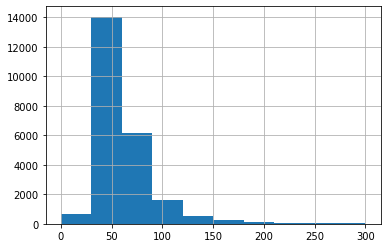

In [59]:
df['total_area'].hist(bins=10, range=(0, 300));

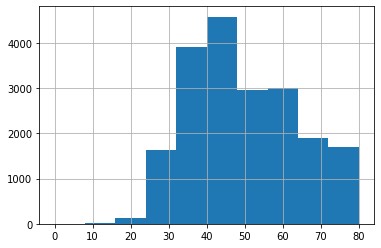

In [60]:
df['total_area'].hist(bins=10, range=(0, 80));

#### I plotted histograms for the area in two ranges. The most common apartments have an area between 30–60 sq. m. Outliers appear in the 0–25 sq. m range, and apartments with areas over 200 sq. m are much less frequent.

#### Price

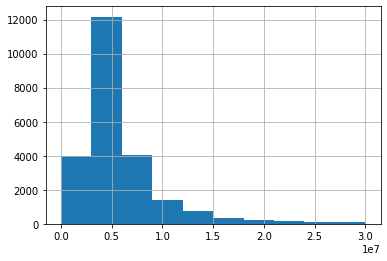

In [61]:
df['last_price'].hist(bins=10, range=(0, 30000000));

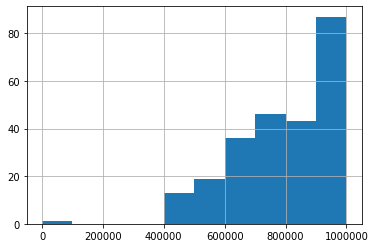

In [62]:
df['last_price'].hist(bins=10, range=(0, 1000000));

In [63]:
df['last_price'].min(), df['last_price'].max()

(12190, 763000000)

####  Histograms were also plotted for price in two ranges. Some listings have a price of 0. The normal distribution starts above 400,000 and peaks in the 3–6 million range. Prices above 20 million are rare.

#### Number of Rooms

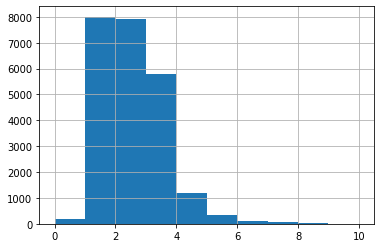

In [64]:
df['rooms'].hist(range=(0, 10));

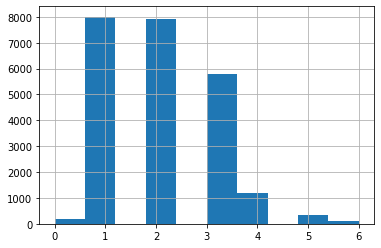

In [65]:
df['rooms'].hist(range=(0, 6));

#### From the histograms, 1- and 2-room apartments occur more frequently than others. Outliers appear around 0, and the frequency decreases for apartments with more than 5 rooms.

#### Ceiling Height

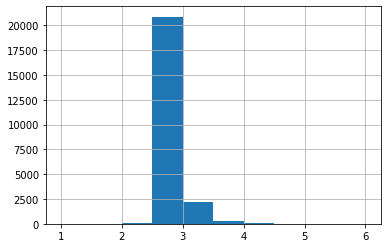

In [66]:
df['ceiling_height'].hist(range=(1, 6));

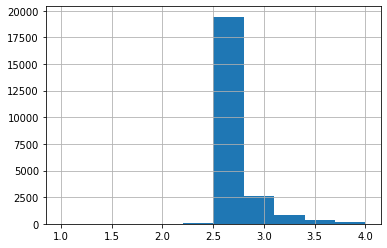

In [67]:
df['ceiling_height'].hist(range=(1, 4));

#### Conclusion on Ceiling Height: 
From the ceiling height histograms, the most frequent values are between 2.5 and 2.75 meters. Heights below 2.5 meters and above 3.5 meters occur less frequently.

##### 2. Analyze Apartment Sale Duration. Build a histogram. Calculate the mean and median. Describe how long a sale usually takes, and determine what counts as a very fast or unusually long sale.

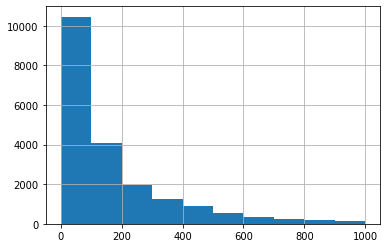

In [68]:
df['days_exposition'].hist(range=(0, 1000)); 

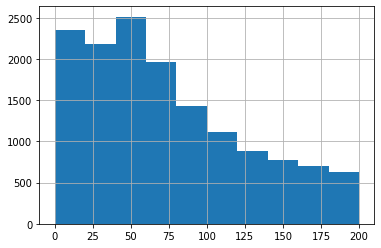

In [69]:
df['days_exposition'].hist(range=(0, 200)); 

In [70]:
df['days_exposition'].median(), df['days_exposition'].mean()

(95.0, 180.7413945278023)

#### Conclusion
1. The median sale duration is 95 days, which is about half of the mean duration of 181 days.
2. The interval between the median and the mean may indicate quick sales, while values exceeding 300 days may indicate unusually long sale times.

##### 3. Remove Rare and Outlier Values

In [71]:
import seaborn
from matplotlib.pyplot import show

<span style="color:blue"> I plotted boxplots for all the parameters mentioned above to identify outliers outside the lower and upper boundaries (Q1 - 1.5*IQR and Q3 + 1.5*IQR). I then created a subset excluding these outliers. After that, I plotted histograms and scatter plots for the cleaned data.</span>

In [72]:
df_filtered = df[['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','kitchen_area','locality_name','cityCenters_nearest','days_exposition','price_per_sq_meters','modified_fd_exposition','weekday_normalized','month_normalized','year_normalized','floors_grouped','ration_for_living','ration_for_kitchen']]
df_filtered.head()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized,floors_grouped,ration_for_living,ration_for_kitchen
0,13000000,108.0,3,2.70,16,51.00,8,25.0,Санкт-Петербург,16028.0,NaN,120370.0,2019-03-07,3,3,2019,другой,0.47,0.23
1,3350000,40.4,1,2.65,11,18.60,1,11.0,посёлок Шушары,18603.0,81.0,82921.0,2018-12-04,1,12,2018,первый,0.46,0.27
2,5196000,56.0,2,2.65,5,34.30,4,8.3,Санкт-Петербург,13933.0,558.0,92786.0,2015-08-20,3,8,2015,другой,0.61,0.15
3,64900000,159.0,3,2.65,14,90.63,9,NaN,Санкт-Петербург,6800.0,424.0,408176.0,2015-07-24,4,7,2015,другой,0.57,NaN
4,10000000,100.0,2,3.03,14,32.00,13,41.0,Санкт-Петербург,8098.0,121.0,100000.0,2018-06-19,1,6,2018,другой,0.32,0.41


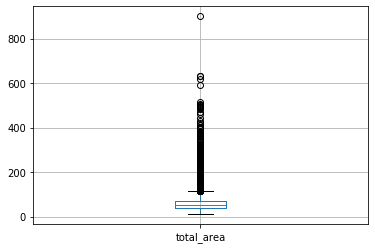

In [73]:
df_filtered.boxplot(column='total_area');

In [74]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['total_area'] >= 125].index, inplace=False)
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['total_area'] <= 30].index, inplace=False)

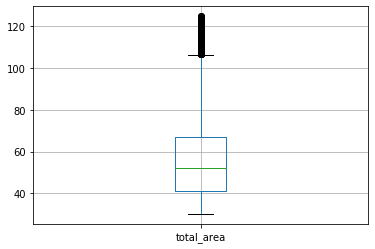

In [75]:
df_filtered.boxplot(column='total_area');

In [76]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['total_area'] >= 100].index, inplace=False)

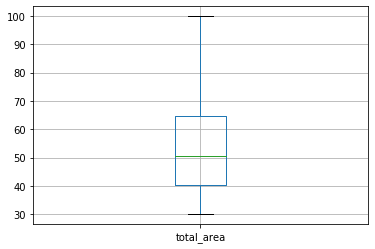

In [77]:
df_filtered.boxplot(column='total_area');

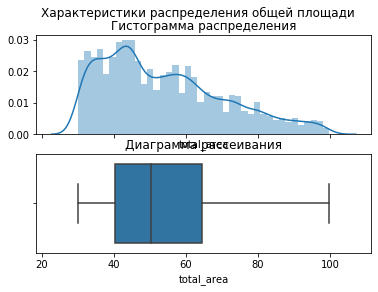

In [78]:
f, ax = plt.subplots(2,1, sharex=True)

ax[0].set_title("Гистограмма распределения")
ax[1].set_title('Диаграмма рассеивания')

seaborn.boxplot(df_filtered['total_area'], ax=ax[1])
seaborn.distplot(df_filtered['total_area'], ax=ax[0])

plt.suptitle("Характеристики распределения общей площади", size=12)
plt.show()


#### I specifically removed apartments with total area > 125 sq. m, since the main peak on the histogram is between 40–60 sq. m. These extreme values were excluded from further analysis.

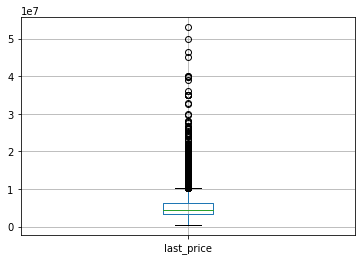

In [79]:
df_filtered.boxplot(column='last_price');

#### From the price boxplot, outliers appear above 9–10 million. Therefore, all values exceeding this range were removed.

In [80]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['last_price'] >= 9000000].index, inplace=False)

In [81]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['last_price'] < 1000000].index, inplace=False)

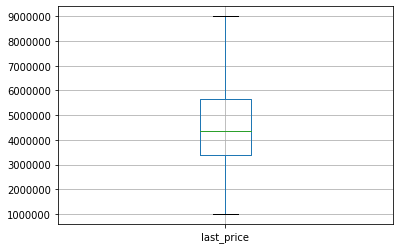

In [82]:
df_filtered.boxplot(column='last_price');

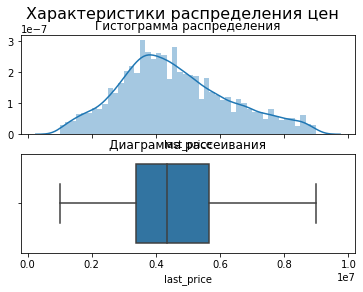

In [83]:
f, ax = plt.subplots(2,1, sharex=True)

ax[0].set_title("Гистограмма распределения")
ax[1].set_title('Диаграмма рассеивания')

seaborn.boxplot(df_filtered['last_price'], ax=ax[1])
seaborn.distplot(df_filtered['last_price'], ax=ax[0])

plt.suptitle("Характеристики распределения цен", size=16)
plt.show()


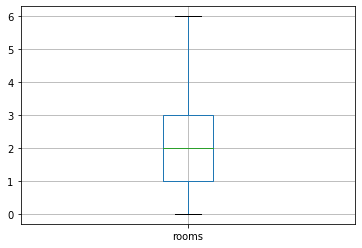

In [84]:
df_filtered.boxplot(column='rooms'); 

#### From the boxplot for the number of rooms, apartments with 0 or more than 3 rooms are rare, so these values were removed.

In [85]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['rooms'] > 3].index, inplace=False)

In [86]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['rooms'] < 1].index, inplace=False)

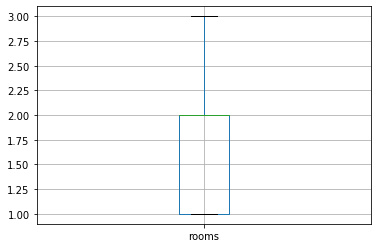

In [87]:
df_filtered.boxplot(column='rooms');

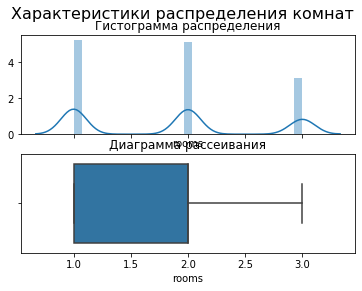

In [88]:

f, ax = plt.subplots(2,1, sharex=True)

ax[0].set_title("Гистограмма распределения")
ax[1].set_title('Диаграмма рассеивания')

seaborn.boxplot(df_filtered['rooms'], ax=ax[1])
seaborn.distplot(df_filtered['rooms'], ax=ax[0])

plt.suptitle("Характеристики распределения комнат", size=16)
plt.show()


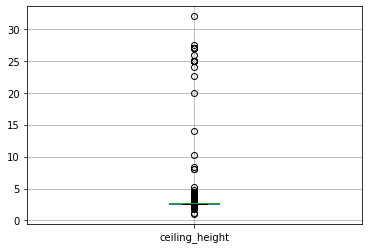

In [89]:
df_filtered.boxplot(column='ceiling_height');

#### There are many outliers in ceiling height below 2.5 m and above 3.0 m, so these values were removed.

In [90]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['ceiling_height'] > 3.0].index, inplace=False)

In [91]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['ceiling_height'] < 2.5].index, inplace=False)

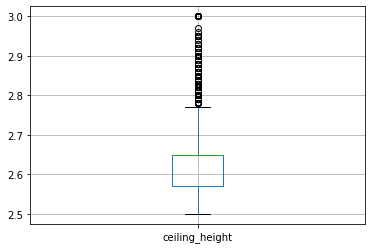

In [92]:
df_filtered.boxplot(column='ceiling_height');

 #### Outliers above 2.75 m still remained, so they were removed as well.

In [93]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['ceiling_height'] > 2.75].index, inplace=False)

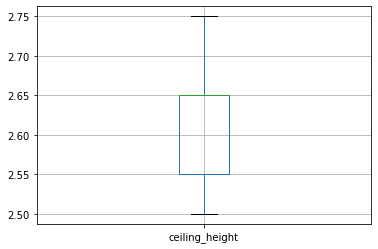

In [94]:
df_filtered.boxplot(column='ceiling_height');

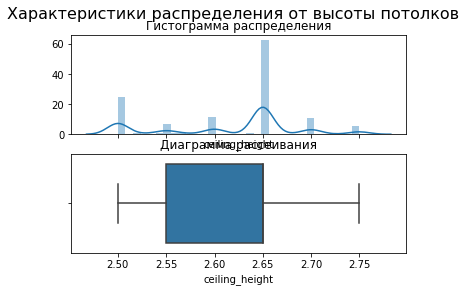

In [95]:
f, ax = plt.subplots(2,1, sharex=True)

ax[0].set_title("Гистограмма распределения")
ax[1].set_title('Диаграмма рассеивания')

seaborn.boxplot(df_filtered['ceiling_height'], ax=ax[1])
seaborn.distplot(df_filtered['ceiling_height'], ax=ax[0])

plt.suptitle("Характеристики распределения от высоты потолков", size=16)
plt.show()


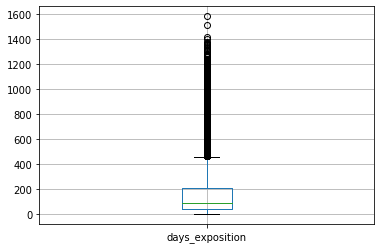

In [96]:
df_filtered.boxplot(column='days_exposition');

#### The boxplot for listing duration shows outliers beyond 400 days, which were also removed.

In [97]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['days_exposition'] > 400].index, inplace=False)

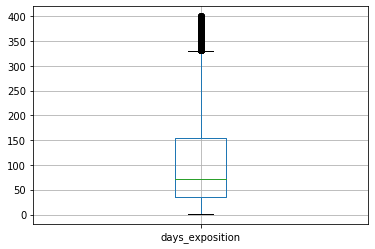

In [98]:
df_filtered.boxplot(column='days_exposition');

#### Some outliers still remained, so values above 250 were removed.

In [99]:
df_filtered = df_filtered.drop(df_filtered.loc[df_filtered['days_exposition'] >= 250].index, inplace=False)

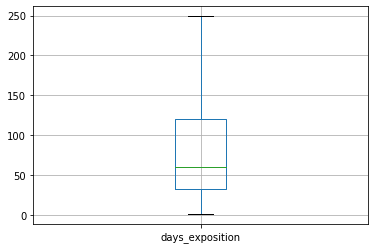

In [100]:
df_filtered.boxplot(column='days_exposition');

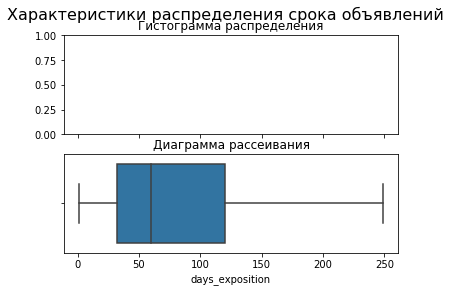

In [101]:
#Несколько диаграмм на одном рисунке

f, ax = plt.subplots(2,1, sharex=True)

ax[0].set_title("Гистограмма распределения")
ax[1].set_title('Диаграмма рассеивания')

seaborn.boxplot(df_filtered['days_exposition'], ax=ax[1])
#seaborn.distplot(df_filtered['days_exposition'], ax=ax[0])

plt.suptitle("Характеристики распределения срока объявлений", size=16)
plt.show()


<span style="color:blue"> I displayed the correlation matrix for both the original and filtered DataFrames to examine changes. After preprocessing, the “above-average” correlations between most parameters remained almost the same. However, the correlation between kitchen area and other areas or price decreased, likely because missing values in this column were not filled.  </span>

In [102]:
df.corr().style.apply(lambda x: ['background: lightpink' if 1 != i < -0.5 or  1 != i > 0.5 else '' for i in x], axis=1)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meters,weekday_normalized,month_normalized,year_normalized,ration_for_living,ration_for_kitchen
total_images,1,0.105026,0.116969,0.0997594,0.00446982,0.00982199,0.102816,0.0327806,-0.0360961,-0.0282013,-0.0246702,0.106896,0.0468793,-0.00294915,-0.0483644,0.0372615,-0.00663993,0.0118142,-0.0058499,-0.0273396,0.133189,-0.00932544,0.00448563,0.139238,-0.00165713,-0.0255674
last_price,0.105026,1,0.653621,0.363191,0.0644111,-0.0067447,0.585657,0.0268418,0.00683796,-0.025084,-0.00880053,0.520362,0.0085685,-0.0265638,-0.205766,0.198286,-0.00958106,0.209284,-0.0752299,0.0808579,0.736799,0.00135692,0.00272596,-0.0428642,0.00263058,-0.0890274
total_area,0.116969,0.653621,1,0.758735,0.0807646,-0.0752519,0.946193,-0.0243682,0.0157808,-0.0720005,-0.0349424,0.609248,0.0102434,-0.0307041,-0.230431,0.201336,-0.0117533,0.201549,-0.0764318,0.149974,0.302571,-0.00567986,0.00496098,-0.0790407,0.13407,-0.31763
rooms,0.0997594,0.363191,0.758735,1,0.0479576,-0.227913,0.827601,-0.151341,0.00481546,-0.146068,-0.0877353,0.270342,-0.0155419,-0.0608647,-0.183998,0.157949,-0.0398709,0.121994,-0.0468217,0.126969,0.0556799,-0.00520708,-0.00391561,-0.0544916,0.463205,-0.590403
ceiling_height,0.00446982,0.0644111,0.0807646,0.0479576,1,-0.0267469,0.0801287,-0.0126036,0.0670844,0.000381244,0.0176738,0.0715854,0.032777,-0.018879,-0.0754613,0.0545767,-0.0141656,0.060244,-0.040279,0.0180979,0.0998851,-0.0098977,-0.0027835,-0.00018889,0.0122982,0.00879939
floors_total,0.00982199,-0.0067447,-0.0752519,-0.227913,-0.0267469,1,-0.15903,0.67801,-0.0030214,0.0702235,0.0508443,0.164803,0.173408,0.107834,0.0182968,-0.158355,0.0854625,-0.048689,0.0500664,-0.0524099,0.148423,0.0125425,0.0169088,0.00788296,-0.349982,0.350353
living_area,0.102816,0.585657,0.946193,0.827601,0.0801287,-0.15903,1,-0.0889125,0.0128444,-0.0557638,-0.0248465,0.436047,-0.0107352,-0.0517463,-0.228503,0.209432,-0.0354569,0.184484,-0.0674969,0.143903,0.232727,-0.00493195,-0.000186786,-0.0713586,0.396414,-0.473289
floor,0.0327806,0.0268418,-0.0243682,-0.151341,-0.0126036,0.67801,-0.0889125,1,0.00407078,0.0359464,0.0361837,0.136545,0.171507,0.0725117,0.00811203,-0.104999,0.0632883,-0.0297108,0.0337548,-0.0390424,0.129203,0.0110166,0.0207359,0.00540424,-0.252892,0.245524
is_apartment,-0.0360961,0.00683796,0.0157808,0.00481546,0.0670844,-0.0030214,0.0128444,0.00407078,1,-0.00394237,-0.00238543,0.0228895,0.158729,-0.00214038,0.00259319,0.00816262,0.00467867,0.0160306,-0.0141508,0.0655221,0.00632867,-0.00992849,-0.106821,-0.207476,-0.00201056,0.00238137
studio,-0.0282013,-0.025084,-0.0720005,-0.146068,0.000381244,0.0702235,-0.0557638,0.0359464,-0.00394237,1,-0.00421613,nan,0.0300189,-0.0222308,-0.00593456,-0.0321202,0.00248773,-0.00925382,0.00337607,-0.0215722,0.0155287,-0.000857536,-0.000716747,0.01086,0.0867097,nan


In [103]:
df_filtered.corr().style.apply(lambda x: ['background: orange' if 1 != i < -0.5 or  1 != i > 0.5 else '' for i in x], axis=1)

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition,price_per_sq_meters,weekday_normalized,month_normalized,year_normalized,ration_for_living,ration_for_kitchen
last_price,1,0.588551,0.372715,0.165717,0.31493,0.456152,0.211228,0.376972,-0.289196,0.0194717,0.653035,-0.00212682,-1.76556e-05,0.0590375,0.0250879,-0.092727
total_area,0.588551,1,0.808429,0.0881116,0.0154475,0.894715,-0.000842481,0.322051,-0.00898351,0.0647784,-0.193747,0.000538253,0.00807144,-0.0165629,0.297717,-0.441292
rooms,0.372715,0.808429,1,-0.128114,-0.231477,0.904249,-0.16755,-0.0768605,0.00294156,0.0506553,-0.289348,0.000897609,-0.00768059,0.00659616,0.627345,-0.684091
ceiling_height,0.165717,0.0881116,-0.128114,1,0.32478,-0.0588614,0.206284,0.351003,-0.0703491,0.00601235,0.124301,0.0137587,0.0167999,-0.149256,-0.281173,0.280821
floors_total,0.31493,0.0154475,-0.231477,0.32478,1,-0.171439,0.666359,0.426392,-0.111981,-0.0233945,0.387279,0.00451572,0.019198,-0.00700865,-0.417171,0.426335
living_area,0.456152,0.894715,0.904249,-0.0588614,-0.171439,1,-0.129163,-0.0113608,-0.000907385,0.0532935,-0.262129,0.00843641,-0.0052898,-0.00216638,0.680863,-0.672187
floor,0.211228,-0.000842481,-0.16755,0.206284,0.666359,-0.129163,1,0.28179,-0.0637528,-0.0208617,0.269885,0.00436892,0.0289516,-0.0058111,-0.292918,0.291032
kitchen_area,0.376972,0.322051,-0.0768605,0.351003,0.426392,-0.0113608,0.28179,1,-0.052061,0.0190444,0.168866,0.00031413,0.0295632,-0.0191166,-0.523861,0.677767
cityCenters_nearest,-0.289196,-0.00898351,0.00294156,-0.0703491,-0.111981,-0.000907385,-0.0637528,-0.052061,1,0.011555,-0.403169,-0.000250508,-0.00979003,0.00074189,0.0106744,-0.0454647
days_exposition,0.0194717,0.0647784,0.0506553,0.00601235,-0.0233945,0.0532935,-0.0208617,0.0190444,0.011555,1,-0.0402704,-0.00495041,-0.0510886,-0.303158,0.00378768,-0.0313068


##### 4. Which Factors Most Affect Apartment Prices? Analyze whether price depends on: Price per square meter, Number of rooms, Floor (first or last), Distance from the city center, Listing date: day of the week, month, and year

<span style="color:blue"> I wrote a loop to plot the dependence of price on these features.</span>

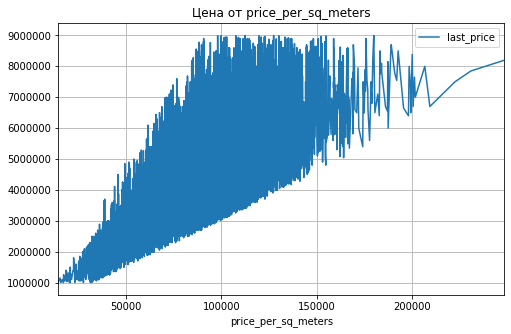

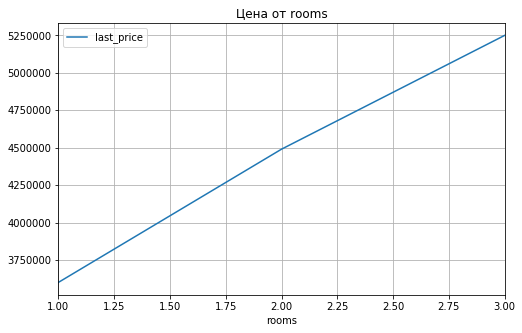

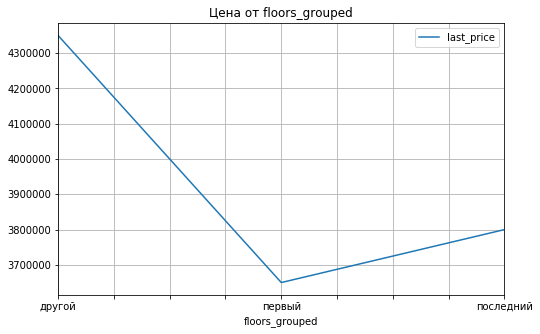

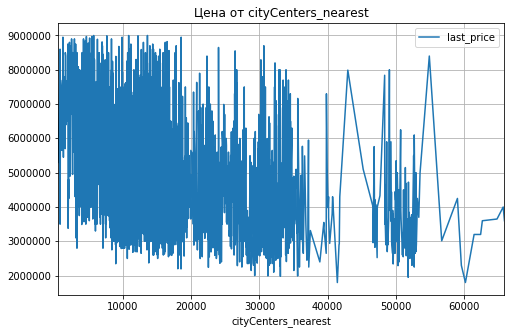

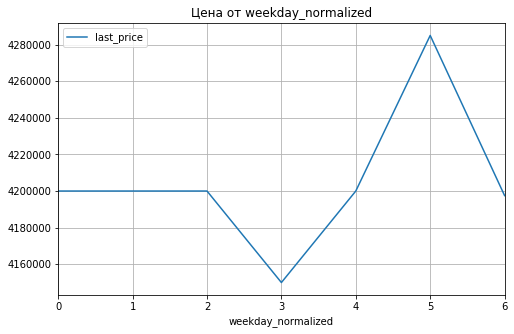

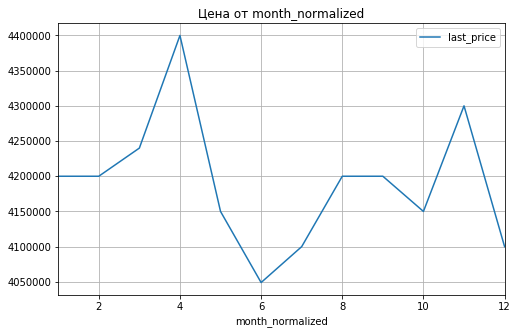

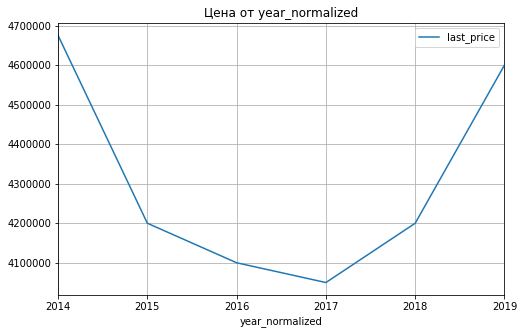

In [104]:
for y in ['price_per_sq_meters','rooms','floors_grouped','cityCenters_nearest','weekday_normalized','month_normalized','year_normalized']:
    (df_filtered.pivot_table(index=y, values='last_price', aggfunc='median')
                .plot(title=f'Цена от {y}', grid=True, figsize=(8, 5))
    );

In [105]:
df_param = df_filtered[['last_price','price_per_sq_meters','rooms','floors_grouped','cityCenters_nearest','weekday_normalized',
                        'month_normalized','year_normalized']]
df_param.corr()['last_price'].sort_values()

cityCenters_nearest   -0.289196
weekday_normalized    -0.002127
month_normalized      -0.000018
year_normalized        0.059038
rooms                  0.372715
price_per_sq_meters    0.653035
last_price             1.000000
Name: last_price, dtype: float64

<span style="color:green"> All features were aggregated using median values. From the plots:
There is a direct relationship between price and number of rooms.
There is a strong relationship between price per square meter and distance from the city center.
Apartments on “other” floors have the highest prices, while apartments on the first floor have the lowest prices.
Prices peak on Saturdays, while remaining mostly stable on other weekdays.
Throughout the year, prices fluctuate, reaching a high in April and May and a low in June.
From the beginning of the dataset until 2017, prices decreased, and then they started rising again. </span>

#####  Select the 10 localities with the highest number of listings. Calculate the average price per square meter in these localities. Identify the localities with the highest and lowest housing prices. These values can be found using the locality_name column.

In [106]:
df_top_10_place = df_filtered['locality_name'].value_counts().head(10)
df_top_10_place

Санкт-Петербург      7966
посёлок Мурино        362
посёлок Шушары        316
посёлок Парголово     251
Всеволожск            250
Колпино               241
Гатчина               210
Пушкин                202
деревня Кудрово       175
Выборг                137
Name: locality_name, dtype: int64

#### Displayed the top 10 most frequently occurring cities and stored them in the variable df_top_10_place.

In [107]:
df_top_10_place.index[0]

'Санкт-Петербург'

In [108]:
mean_value = dict()
for locality in df_top_10_place.index:
    data = df_filtered.query('locality_name == @locality')
    mean_value[locality] = data[['price_per_sq_meters']].mean()[0]
    
locality_mean_value = pd.Series(mean_value)
locality_mean_value

Санкт-Петербург      102732.541175
посёлок Мурино        84889.201657
посёлок Шушары        77792.958861
посёлок Парголово     90022.729084
Всеволожск            66902.800000
Колпино               75583.726141
Гатчина               68663.390476
Пушкин                97859.024752
деревня Кудрово       91520.754286
Выборг                58191.810219
dtype: float64

#### I wrote a loop that iterates over df_top_10_place and, for each locality in this list, calculates the median price per square meter.

In [109]:
locality_mean_value.sort_values(ascending=False)

Санкт-Петербург      102732.541175
Пушкин                97859.024752
деревня Кудрово       91520.754286
посёлок Парголово     90022.729084
посёлок Мурино        84889.201657
посёлок Шушары        77792.958861
Колпино               75583.726141
Гатчина               68663.390476
Всеволожск            66902.800000
Выборг                58191.810219
dtype: float64

#### Using the sort_values() method, I sorted the values in descending order. Then, I used the min() and max() methods to display the values again for verification.

In [110]:
locality_mean_value.min().round(0), locality_mean_value.max().round(0)

(58192.0, 102733.0)

##### Conclusion: From the values, the highest price per square meter is in Saint Petersburg at 103,230, while the lowest price is in Vyborg at 58,286.

#### 5. Analyze Apartment Listings by Distance to the City Center. For each apartment, there is information about the distance to the city center. Select apartments located in Saint Petersburg (locality_name). Your task is to determine which area can be considered the city center. Create a column for distance to the center in kilometers, rounding to the nearest integer. Then, calculate the average price for each kilometer. Plot a graph showing how price depends on distance from the city center. Identify the point where the graph changes significantly — this defines the central zone.

In [111]:
df_piter = df_filtered.query('locality_name == "Санкт-Петербург"')
df_piter

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized,floors_grouped,ration_for_living,ration_for_kitchen
7,7915000,71.60,2,2.65,24,40.812,22,18.90,Санкт-Петербург,11634.0,NaN,110545.0,2019-04-18,3,4,2019,другой,0.57,0.26
10,5050000,39.60,1,2.67,12,20.300,3,8.50,Санкт-Петербург,13878.0,137.0,127525.0,2017-11-16,3,11,2017,другой,0.51,0.21
15,4650000,39.00,1,2.65,14,20.500,5,7.60,Санкт-Петербург,14259.0,19.0,119231.0,2017-11-18,5,11,2017,другой,0.53,0.19
18,3250000,31.00,1,2.50,5,19.400,2,5.60,Санкт-Петербург,10842.0,168.0,104839.0,2017-01-27,4,1,2017,другой,0.63,0.18
27,7100000,70.00,3,2.60,17,49.000,11,9.20,Санкт-Петербург,11456.0,151.0,101429.0,2017-05-12,4,5,2017,другой,0.70,0.13
32,4990000,60.00,3,2.65,5,39.000,4,6.00,Санкт-Петербург,12889.0,224.0,83167.0,2016-05-22,6,5,2016,другой,0.65,0.10
34,3290000,33.00,1,2.55,16,14.000,3,8.00,Санкт-Петербург,12739.0,15.0,99697.0,2018-02-04,6,2,2018,другой,0.42,0.24
36,3790000,45.00,2,2.65,9,27.000,9,6.30,Санкт-Петербург,16461.0,139.0,84222.0,2017-01-25,2,1,2017,последний,0.60,0.14
39,5200000,54.40,2,2.75,9,29.700,2,8.80,Санкт-Петербург,12209.0,29.0,95588.0,2018-11-29,3,11,2018,другой,0.55,0.16
41,7900000,74.00,3,2.65,14,59.000,8,12.00,Санкт-Петербург,12612.0,179.0,106757.0,2016-05-04,2,5,2016,другой,0.80,0.16


#### Analyze the Central Apartment Segment

In [112]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
df_piter['cityCenters_km'] = (df_piter['cityCenters_nearest'] / 1000).round(0)
df_piter.head()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized,floors_grouped,ration_for_living,ration_for_kitchen,cityCenters_km
7,7915000,71.6,2,2.65,24,40.812,22,18.9,Санкт-Петербург,11634.0,NaN,110545.0,2019-04-18,3,4,2019,другой,0.57,0.26,12.0
10,5050000,39.6,1,2.67,12,20.300,3,8.5,Санкт-Петербург,13878.0,137.0,127525.0,2017-11-16,3,11,2017,другой,0.51,0.21,14.0
15,4650000,39.0,1,2.65,14,20.500,5,7.6,Санкт-Петербург,14259.0,19.0,119231.0,2017-11-18,5,11,2017,другой,0.53,0.19,14.0
18,3250000,31.0,1,2.50,5,19.400,2,5.6,Санкт-Петербург,10842.0,168.0,104839.0,2017-01-27,4,1,2017,другой,0.63,0.18,11.0
27,7100000,70.0,3,2.60,17,49.000,11,9.2,Санкт-Петербург,11456.0,151.0,101429.0,2017-05-12,4,5,2017,другой,0.70,0.13,11.0


In [114]:
df_piter['cityCenters_km'].min(), df_piter['cityCenters_km'].max()

(0.0, 29.0)

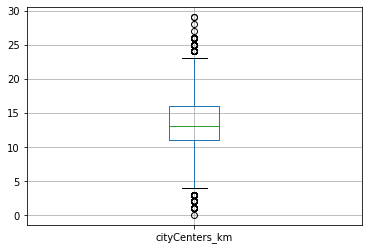

In [115]:
df_piter.boxplot(column=['cityCenters_km']);

In [116]:
df_piter = df_piter.drop(df_piter.loc[df_piter['cityCenters_km'] < 5].index, inplace=False)
df_piter = df_piter.drop(df_piter.loc[df_piter['cityCenters_km'] > 23].index, inplace=False)

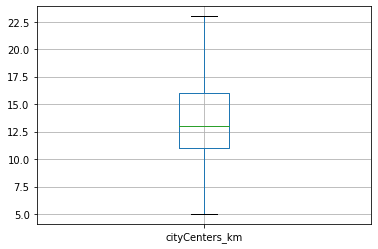

In [117]:
df_piter.boxplot(column=['cityCenters_km']);

#### Converted the distance to the city center into kilometers.

Create a column for distance to the city center in kilometers, rounding to the nearest integer. Then, calculate the average price for each kilometer.

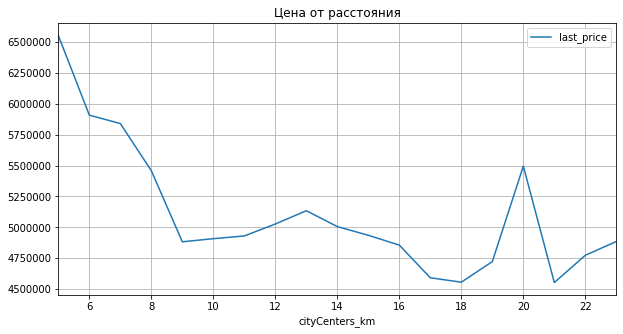

In [118]:
(df_piter.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
         .plot(title='Цена от расстояния', grid=True, figsize=(10, 5))
);

#### 6. Analyze the Central Apartment Segment. Select apartments located in the city center and analyze the following parameters: Area. Price. Number of rooms. Ceiling height. Also, identify factors affecting apartment prices: Number of rooms.Floor. Distance from the city center. Listing date. Draw conclusions. Do they differ from the overall findings for the entire city?

In [120]:
df_filtered['citycenters_km'] = (df_filtered['cityCenters_nearest'] / 1000).round(0)
df_filtered

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized,floors_grouped,ration_for_living,ration_for_kitchen,citycenters_km
1,3350000,40.40,1,2.65,11,18.600,1,11.00,посёлок Шушары,18603.0,81.0,82921.0,2018-12-04,1,12,2018,первый,0.46,0.27,19.0
5,2890000,30.40,1,2.65,12,14.400,5,9.10,городской посёлок Янино-1,NaN,55.0,95066.0,2018-09-10,0,9,2018,другой,0.47,0.30,NaN
6,3700000,37.30,1,2.65,26,10.600,6,14.40,посёлок Парголово,19143.0,155.0,99196.0,2017-11-02,3,11,2017,другой,0.28,0.39,19.0
7,7915000,71.60,2,2.65,24,40.812,22,18.90,Санкт-Петербург,11634.0,NaN,110545.0,2019-04-18,3,4,2019,другой,0.57,0.26,12.0
8,2900000,33.16,1,2.65,27,15.430,26,8.81,посёлок Мурино,NaN,189.0,87455.0,2018-05-23,2,5,2018,другой,0.47,0.27,NaN
10,5050000,39.60,1,2.67,12,20.300,3,8.50,Санкт-Петербург,13878.0,137.0,127525.0,2017-11-16,3,11,2017,другой,0.51,0.21,14.0
11,3300000,44.00,2,2.65,5,31.000,4,6.00,Ломоносов,51677.0,7.0,75000.0,2018-08-27,0,8,2018,другой,0.70,0.14,52.0
12,3890000,54.00,2,2.65,5,30.000,5,9.00,Сертолово,NaN,90.0,72037.0,2016-06-30,3,6,2016,последний,0.56,0.17,NaN
14,4400000,36.00,1,2.65,6,17.000,1,8.00,Пушкин,30759.0,203.0,122222.0,2016-06-23,3,6,2016,первый,0.47,0.22,31.0
15,4650000,39.00,1,2.65,14,20.500,5,7.60,Санкт-Петербург,14259.0,19.0,119231.0,2017-11-18,5,11,2017,другой,0.53,0.19,14.0


<span style="color:orange"> Based on the graph above, a data slice was created for apartments located within 9 km, which defines the city center. </span>

In [121]:
df_center = df_filtered.query('citycenters_km <= 9')
df_center

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_sq_meters,modified_fd_exposition,weekday_normalized,month_normalized,year_normalized,floors_grouped,ration_for_living,ration_for_kitchen,citycenters_km
111,4590000,40.00,1,2.65,6,18.000,1,10.00,Санкт-Петербург,6175.0,31.0,114750.0,2017-05-29,0,5,2017,первый,0.45,0.25,6.0
115,3850000,42.00,2,2.65,5,27.000,4,6.50,Санкт-Петербург,8535.0,73.0,91667.0,2018-11-05,0,11,2018,другой,0.64,0.15,9.0
118,4500000,31.00,1,2.50,9,17.000,4,5.00,Санкт-Петербург,9089.0,60.0,145161.0,2019-02-24,6,2,2019,другой,0.55,0.16,9.0
138,4800000,40.00,2,2.65,3,29.000,2,6.00,Санкт-Петербург,2913.0,80.0,120000.0,2017-11-18,5,11,2017,другой,0.72,0.15,3.0
141,6500000,32.60,1,2.65,5,18.500,5,5.50,Санкт-Петербург,5448.0,NaN,199387.0,2019-02-27,2,2,2019,последний,0.57,0.17,5.0
150,3900000,45.00,2,2.65,5,29.000,3,6.00,Санкт-Петербург,9052.0,222.0,86667.0,2017-07-01,5,7,2017,другой,0.64,0.13,9.0
206,5080000,31.30,1,2.50,7,16.000,4,7.60,Санкт-Петербург,6692.0,NaN,162300.0,2019-04-23,1,4,2019,другой,0.51,0.24,7.0
219,7700000,58.70,1,2.65,7,17.000,3,15.70,Санкт-Петербург,4670.0,136.0,131175.0,2017-12-12,1,12,2017,другой,0.29,0.27,5.0
234,7820000,57.00,2,2.65,5,33.000,3,8.00,Санкт-Петербург,5700.0,NaN,137193.0,2019-04-18,3,4,2019,другой,0.58,0.14,6.0
305,6283000,70.80,3,2.65,5,50.900,5,8.20,Санкт-Петербург,4235.0,61.0,88743.0,2017-10-05,3,10,2017,последний,0.72,0.12,4.0


<span style="color:blue">A function was written to automatically build histograms for the following features:
['total_area', 'last_price', 'rooms', 'ceiling_height']</span>

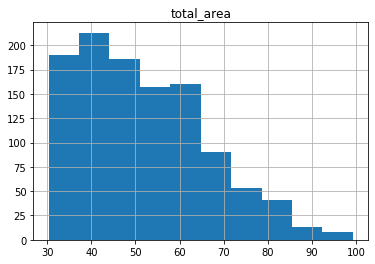

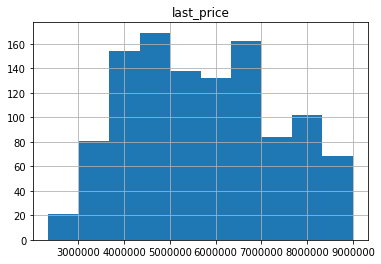

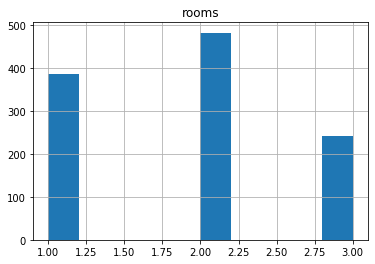

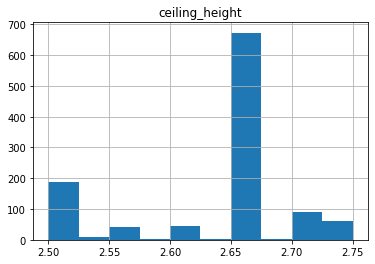

In [122]:
def hist_for_column_lst(df, lst):
    for category in lst:
        plt.figure()
        plt.hist(df[category])
        plt.title(category)
        plt.grid(True)
        plt.show()

hist_for_column_lst(df_center, ['total_area','last_price','rooms','ceiling_height'])

#### Histograms were constructed for the filtered DataFrame.

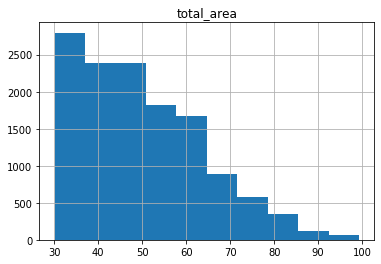

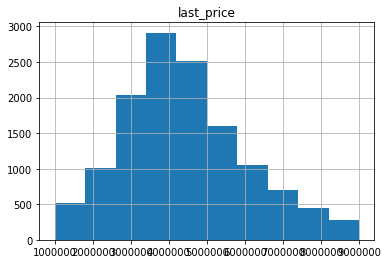

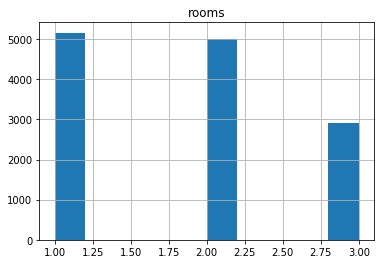

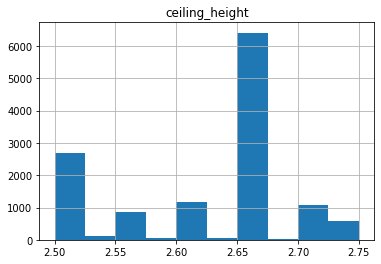

In [123]:
def hist_for_column_lst(df, lst):
    for category in lst:
        plt.figure()
        plt.hist(df[category])
        plt.title(category)
        plt.grid(True)
        plt.show()

hist_for_column_lst(df_filtered, ['total_area','last_price','rooms','ceiling_height'])

<span style="color:blue">I also rebuilt price–feature dependency plots using a loop.</span>

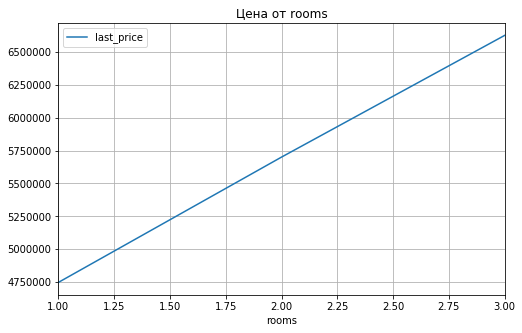

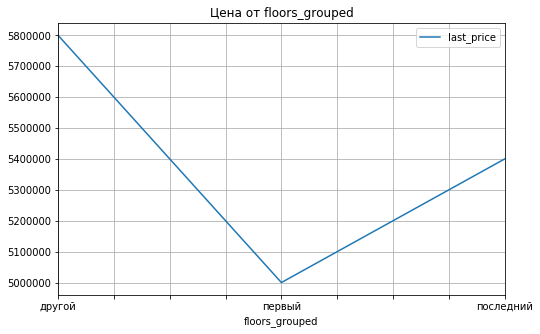

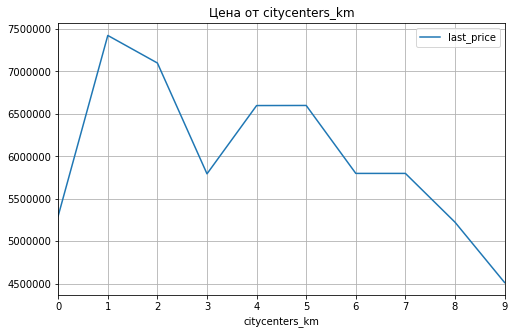

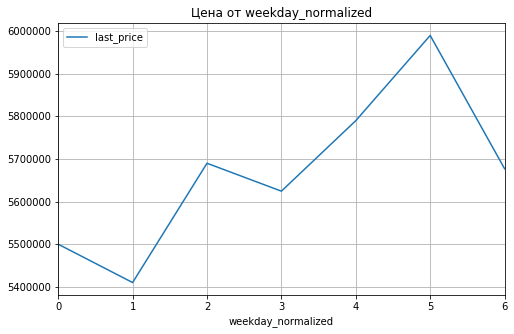

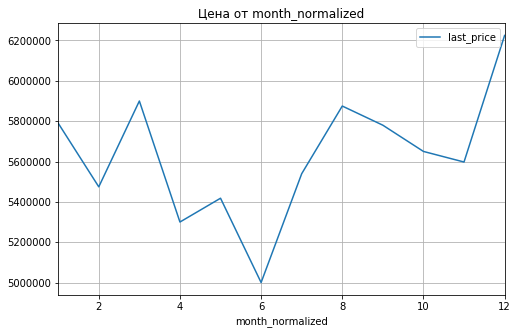

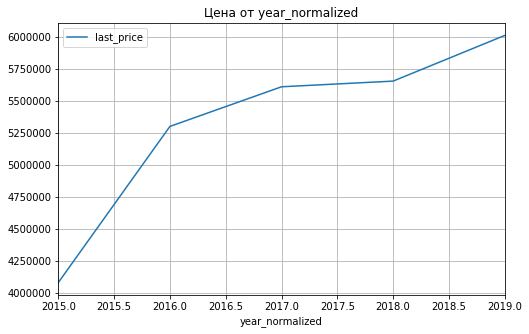

In [124]:
for y in ['rooms','floors_grouped','citycenters_km','weekday_normalized','month_normalized','year_normalized']:
    (df_center.pivot_table(index=y, values='last_price', aggfunc='median')
              .plot(title=f'Цена от {y}', grid=True, figsize=(8, 5))
    );

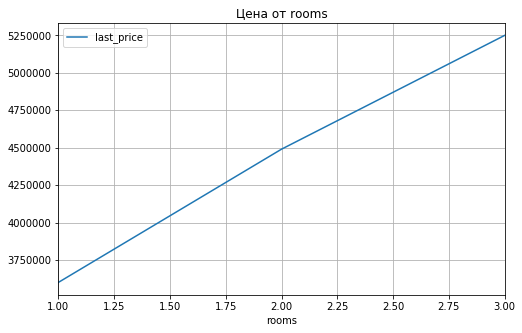

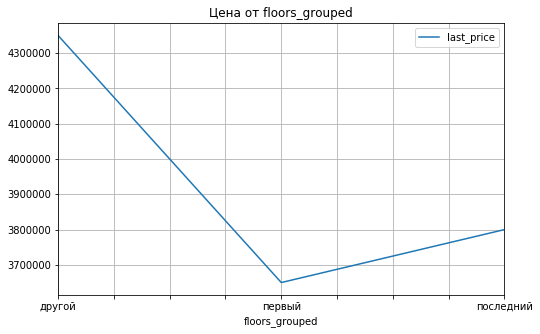

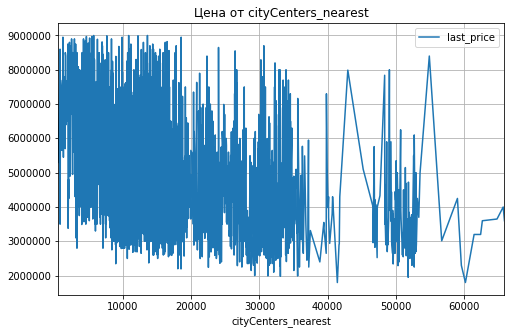

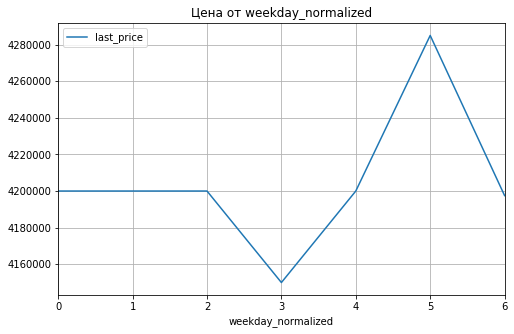

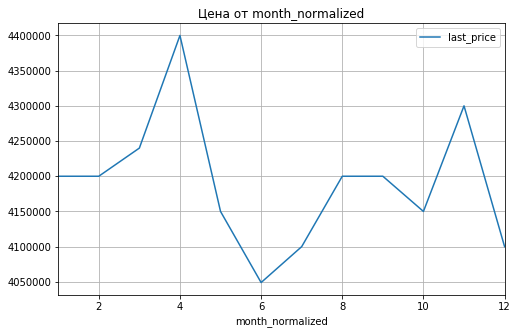

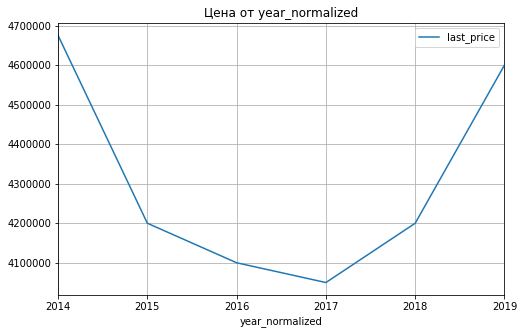

In [125]:
for y in ['rooms','floors_grouped','cityCenters_nearest','weekday_normalized','month_normalized','year_normalized']:
    (df_filtered.pivot_table(index=y, values='last_price', aggfunc='median')
                .plot(title=f'Цена от {y}', grid=True, figsize=(8, 5))
    );

In [126]:
df_param_new = df_center[['last_price','rooms','floors_grouped','cityCenters_nearest','weekday_normalized',
                        'month_normalized','year_normalized']]
df_param_new.corr()['last_price'].sort_values()

cityCenters_nearest   -0.356259
weekday_normalized     0.027111
month_normalized       0.040032
year_normalized        0.101825
rooms                  0.391846
last_price             1.000000
Name: last_price, dtype: float64

In [127]:
df_param_new.corr().style.apply(lambda x: ['background: lightgreen' if 1 != i < -0.4 or  1 != i > 0.4 else '' for i in x], 
               axis=1)

,last_price,rooms,cityCenters_nearest,weekday_normalized,month_normalized,year_normalized
last_price,1,0.391846,-0.356259,0.0271106,0.0400323,0.101825
rooms,0.391846,1,-0.111316,-0.0123624,0.0162278,0.00572457
cityCenters_nearest,-0.356259,-0.111316,1,-0.025121,-0.07322,0.120123
weekday_normalized,0.0271106,-0.0123624,-0.025121,1,0.0261843,0.0128823
month_normalized,0.0400323,0.0162278,-0.07322,0.0261843,1,-0.313789
year_normalized,0.101825,0.00572457,0.120123,0.0128823,-0.313789,1


In [128]:
#pd.plotting.scatter_matrix(df_param_new, figsize=(15, 15));

<span style="color:blue">Dependency plots and correlation values for apartments in the city center, as well as for apartments across the entire city, show a moderate relationship between price and the number of rooms, and a weak negative relationship with distance from the city center. All other parameters demonstrate only a weak relationship. </span>

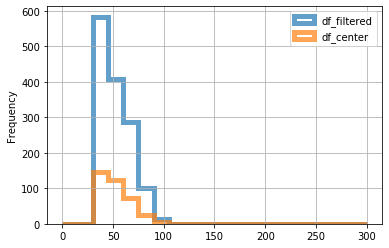

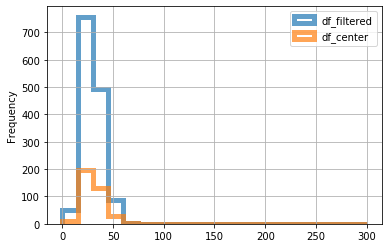

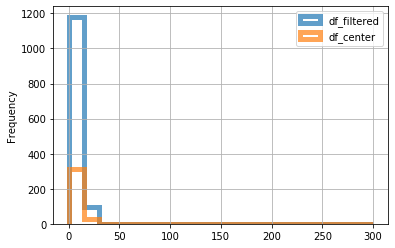

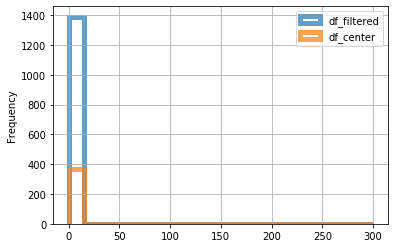

In [129]:
for y in ['total_area','living_area','kitchen_area','ceiling_height']:
    median_price = df_filtered.pivot_table(index="last_price", values=y, aggfunc="median")
    good_price = df_center.pivot_table(index="last_price", values=y, aggfunc="median")

    ax = median_price.plot(kind='hist', y=y, histtype='step', range=(0, 300), bins=20, linewidth=5, alpha=0.7, label='df_filtered')
    good_price.plot(kind='hist', y=y, histtype='step', range=(0, 300), bins=20, linewidth=5, alpha=0.7, label='df_center', ax=ax, grid=True, legend=True)

<span style="color:orange"> All features were aggregated by median values along with price. The plots show a direct relationship between price and number of rooms, as well as a strong relationship between price and distance from the city center, with prices ranging from 4 to 8 million. Apartments located on “other” floors have the highest prices, while apartments on the first floor have the lowest prices. In addition, apartment prices peak on Sundays. Moreover, from the beginning of the year, prices increase and reach their maximum in December. Housing prices show an overall upward trend from 2015 to 2019. </span>

### Step 5. Overall Conclusion

After data preprocessing and visualizing the key parameters, the following conclusions can be drawn:
1. Apartment prices are strongly influenced by price per square meter and distance from the city center. As a rule, apartments located within 25 km of the city have the highest prices. There is also a moderate relationship between the number of rooms and total area, and consequently with price. Other features show only a weak relationship with price.
2. An analysis by apartment type was not performed.

### Overall Conclusion
After removing outliers, cleaning the data, and comparing the data and visualizations for the filtered DataFrame and the city center subset, several conclusions can be drawn:
1. In df_filtered, the most common total area is 30–35 sq. m, while in df_center it is 35–45 sq. m.
2. For df_filtered, prices most frequently fall within the range of 3.5–4 million, whereas for df_center the peak range is 4.5–5 million.
3. Apartment prices increase with the number of rooms for both df_filtered and df_center.
4. Apartment prices decrease for both df_filtered and df_center as the distance from the city center increases.
5. The lowest prices are observed for apartments on the first floor, while the highest prices are for “other” floors. For df_center, the price of apartments on the top floor is slightly lower than the maximum for “other” floors but significantly higher than for the first floor.
6. Higher prices are observed for both df_filtered and df_center on Saturdays.
7. Prices increase for df_filtered in April and November, while for df_center they peak in December. A decline in prices is observed for both datasets in June.
8. Prices in df_filtered decreased until 2017 and then started to rise again, whereas df_center shows continuous growth.
9. No significant differences in ceiling heights were observed.

### Project Readiness Checklis

Mark completed items with an 'x'. Then press Shift + Enter.

- [x]  The file has been opened
- [x]  The data has been explored (first rows displayed, info() method used)
- [x]  Missing values have been identified
- [x]  Missing values have been filled
- [x]  There is an explanation of which missing values were found
- [x]  Data types have been changed
- [x]  There is an explanation of which columns had their data types changed and why
- [x]  Price per square meter has been calculated and added to the table
- [x]  Day of the week, month, and year of the listing publication have been calculated and added
- [x]  Apartment floor category has been calculated and added (options: first, last, other)
- [x]  Ratios of living area to total area and kitchen area to total area have been calculated and added
- [x]  The following parameters have been analyzed: area, price, number of rooms, ceiling height
- [x]  Histograms have been built for each parameter
- [x]  he task “Analyze the apartment sale duration. Build a histogram. Calculate the mean and median. Describe how long a sale usually takes. Determine which sales can be considered very fast and which unusually long.” has been completed
- [x]  The task “Remove rare and outlier values. Describe the patterns you identified.” has been completed
- [x]  The task “Which factors most strongly affect apartment prices? Analyze whether price depends on price per square meter, number of rooms, floor (first or last), and distance from the city center. Also analyze the dependence on the listing date: day of the week, month, and year. Select the 10 localities with the highest number of listings. Calculate the average price per square meter for these localities. Identify the localities with the highest and lowest housing prices.” has been completed
- [x]  The task “Analyze apartment listings with distance-to-center data. Select apartments in Saint Petersburg (locality_name). Determine which area can be considered the city center. Create a column with distance to the center in kilometers (rounded to integers). Calculate the average price for each kilometer and plot a graph showing how price depends on distance from the center. Identify the boundary where the graph changes significantly — this will define the central zone.” has been completed
- [x]  The task “Analyze the central apartment segment. Study this area and analyze the following parameters: area, price, number of rooms, ceiling height. Identify factors affecting apartment prices (number of rooms, floor, distance from the center, listing date). Draw conclusions. Do they differ from the overall conclusions for the entire city?” has been completed
- [x]  Conclusions are provided at each stage
- [x]  A final overall conclusion is provided